(2110, 1125, 1125)
(600, 250, 600)


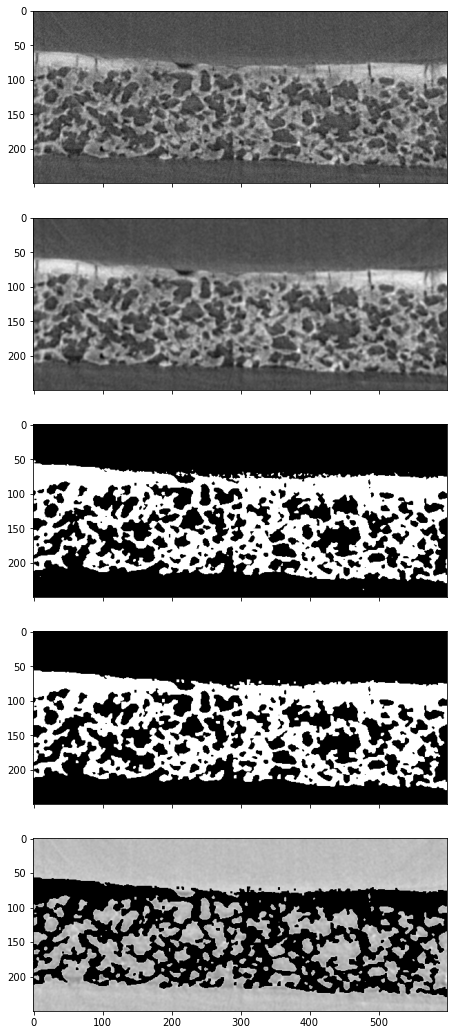

In [11]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

from skimage import data, img_as_float
from skimage.io import imread_collection
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise
from skimage.filters import threshold_otsu
from skimage.util import crop
from skimage.measure import compare_psnr
from skimage.morphology import binary_erosion, binary_dilation, cube
from skimage import filters
from skimage.morphology import disk
from skimage.filters import gaussian
from PIL import Image

#Read in data for zeroth volume. This will be used as mask for the filter/cat phase.
full_volume = io.volread('E:/paper_2/Volumes_Cat/TiffSaver-tomo_C0.tif')
print(full_volume.shape)

#Crop for analysis (Representative volumes are still be determined)
vol_0 = crop(full_volume, ((0, 1510),(870, 5), (270, 255)), copy=True)
print(vol_0.shape)

#Gaussian Filter
vol_0_gaussian=gaussian(vol_0, sigma=1, output=None, mode='nearest', cval=0, multichannel=False, preserve_range=True,
                       truncate=4.0)

#Apply binary threshold 1
thresh_yen_vol1=filters.threshold_yen(vol_0_gaussian)
segmented_yen_vol_0 = vol_0_gaussian > thresh_yen_vol1 -1

#Erosion/Dilation of binary 1
segmented_yen_eroded_vol_0_1=binary_erosion(segmented_yen_vol_0, cube(2))
segmented_yen_eroded_vol_0_2=binary_erosion(segmented_yen_eroded_vol_0_1, cube(2))
segmented_yen_eroded_vol_0=binary_erosion(segmented_yen_eroded_vol_0_2, cube(1))
segmented_yen_eroded_dilated_vol_0_1=binary_dilation(segmented_yen_eroded_vol_0, cube(2))
segmented_yen_eroded_dilated_vol_0_2=binary_dilation(segmented_yen_eroded_dilated_vol_0_1, cube(2))
#segmented_yen_eroded_dilated_vol_0_3=binary_dilation(segmented_yen_eroded_dilated_vol_0_2, cube(1))
segmented_yen_eroded_dilated_vol_0=binary_dilation(segmented_yen_eroded_dilated_vol_0_2, cube(1))

#Create mask
mask = 1 - segmented_yen_eroded_dilated_vol_0
masked_0 = vol_0_gaussian * mask

#Plot images of raw, filtered, threshold, threshold wt erosion/dilation
fig, axes = plt.subplots(nrows=5, ncols=1,figsize = (60, 18.4),
                       sharex=True, sharey=True)
axes[0].imshow(vol_0[50], cmap = 'gray')
axes[1].imshow(vol_0_gaussian[50], cmap = 'gray')
axes[2].imshow(segmented_yen_vol_0[50], cmap = 'gray')
axes[3].imshow(segmented_yen_eroded_dilated_vol_0[50], cmap='gray')
axes[4].imshow(masked_0[50], cmap='gray')